  
  # Ride Price Estimation System — Mini Project
## 📌 Project Overview

This project builds a machine learning system that estimates ride prices based on trip details and contextual factors such as distance, traffic, demand, and weather conditions. The goal is not only to predict prices but also to demonstrate the complete machine learning workflow from dataset creation to model evaluation.

## 🎯 Problem Statement

Ride prices in real-world transportation services vary depending on multiple factors. Instead of relying on fixed pricing rules, this project uses machine learning to learn pricing patterns from data and estimate ride prices automatically.

🤖 Why Machine Learning?

Traditional rule-based systems require manually defining pricing formulas and cannot easily adapt to changing patterns. Machine learning can learn relationships between ride conditions and price directly from data, making it more flexible and scalable.

🧠 What the Model Should Learn

* The model is expected to learn:

 * How distance and duration affect total price

 * How contextual factors (traffic, demand, weather, time) influence cost

* Patterns that distinguish high-cost rides from low-cost rides

## Features Used
 * distance_km — Longer trips usually cost more.

    *   duration_min — Time increases cost, especially in traffic.

    *   time_of_day — Rush hours may increase prices.

     *  traffic_level — Heavy traffic increases ride duration.

     *  weather — Bad weather can increase demand and pricing.

     * demand_level — Higher demand leads to surge pricing.

     *  vehicle_type — Premium vehicles cost more.

 ## Feature Considered but Not Included

* Driver experience — Could influence service quality but was excluded because it has less direct impact on price and would be difficult to simulate realistically.


🧠Tip:-

  The the synthesized dataset includes intentional imperfections such as missing values and inconsistent labels to simulate real-world data challenges.



In [ ]:
# Step 1: Load the dataset
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()  # This will open a file chooser in Col




Saving rides.csv to rides (1).csv


In [7]:
# Load the CSV into a DataFrame
df = pd.read_csv("rides.csv")  # Make sure the file you upload is named rides.csv

# Show the first 5 rows
df.head()

,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,vehicle_type,day_of_week,ride_price
0,9.99,33.1,Morning,Medium,Clear,High,Economy,Weekday,218.53
1,23.82,74.7,Afternoon,High,Rainy,Medium,Economy,Weekday,495.94
2,18.57,40.6,Evening,Medium,Clear,Low,Economy,Weekday,210.20
3,15.37,42.0,Night,HIGH,Clear,Medium,Standard,Weekday,282.02
4,4.74,12.0,Night,High,Rainy,Medium,Standard,Weekday,143.72


In [8]:
# Step 2: Inspect the dataset

# Show column names and types
df.info()

# Check for missing values
df.isnull().sum()

# Get basic statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance_km    220 non-null    float64
 1   duration_min   210 non-null    float64
 2   time_of_day    220 non-null    object 
 3   traffic_level  210 non-null    object 
 4   weather        211 non-null    object 
 5   demand_level   220 non-null    object 
 6   vehicle_type   220 non-null    object 
 7   day_of_week    220 non-null    object 
 8   ride_price     220 non-null    float64
dtypes: float64(3), object(6)
memory usage: 15.6+ KB


,distance_km,duration_min,ride_price
count,220.000000,210.000000,220.000000
mean,12.828182,37.088571,271.420545
std,7.719758,22.804872,179.290623
min,1.120000,3.000000,18.310000
25%,6.462500,18.125000,137.217500
50%,13.135000,33.400000,237.380000
75%,18.657500,56.075000,382.647500
max,59.160000,89.100000,1336.620000


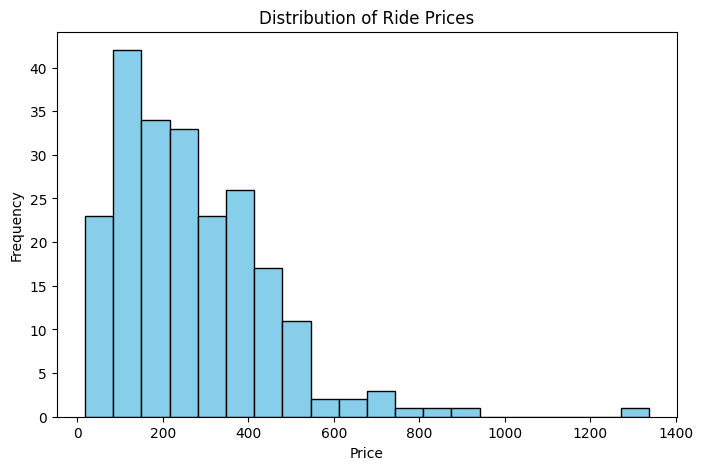

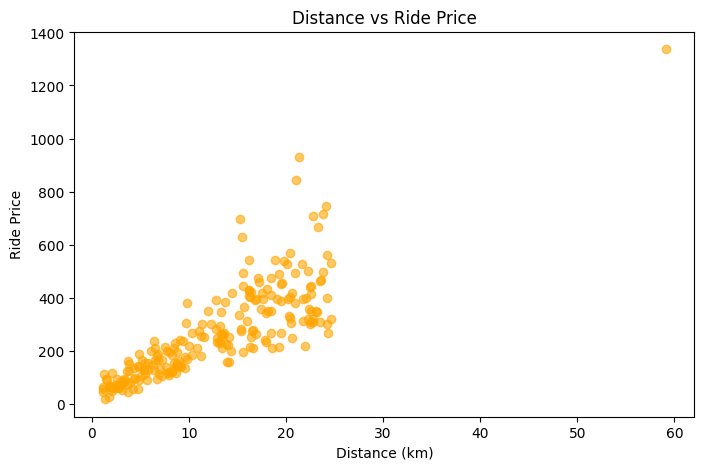

In [9]:
# Step 3: Visualize the dataset
import matplotlib.pyplot as plt

# Histogram of ride prices
plt.figure(figsize=(8,5))
plt.hist(df['ride_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ride Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Distance vs Ride Price
plt.figure(figsize=(8,5))
plt.scatter(df['distance_km'], df['ride_price'], alpha=0.6, color='orange')
plt.title('Distance vs Ride Price')
plt.xlabel('Distance (km)')
plt.ylabel('Ride Price')
plt.show()


In [12]:
# Step 4: Data Cleaning & Feature Engineering
from sklearn.preprocessing import StandardScaler

# 1. Handle missing values
# Fill numerical columns with mean
numerical_cols = ['distance_km', 'duration_min', 'ride_price']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical columns with mode
categorical_cols = ['time_of_day', 'traffic_level', 'weather', 'demand_level', 'vehicle_type', 'day_of_week']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 2. Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Show the first 5 rows after cleaning
df_encoded.head()

,distance_km,duration_min,ride_price,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,traffic_level_High,traffic_level_Low,traffic_level_Medium,weather_Cloudy,weather_Rainy,weather_rainy,demand_level_Low,demand_level_Medium,vehicle_type_Premium,vehicle_type_Standard,day_of_week_Weekend
0,-0.368490,-0.179444,-0.295672,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,1.427102,1.692117,1.255121,False,False,False,True,False,False,False,True,False,False,True,False,False,False
2,0.745478,0.157977,-0.342239,True,False,False,False,False,True,False,False,False,True,False,False,False,False
3,0.330012,0.220962,0.059254,False,False,True,False,False,False,False,False,False,False,True,False,True,False
4,-1.050114,-1.128721,-0.713879,False,False,True,True,False,False,False,True,False,False,True,False,True,False


Mean Absolute Error: 0.180


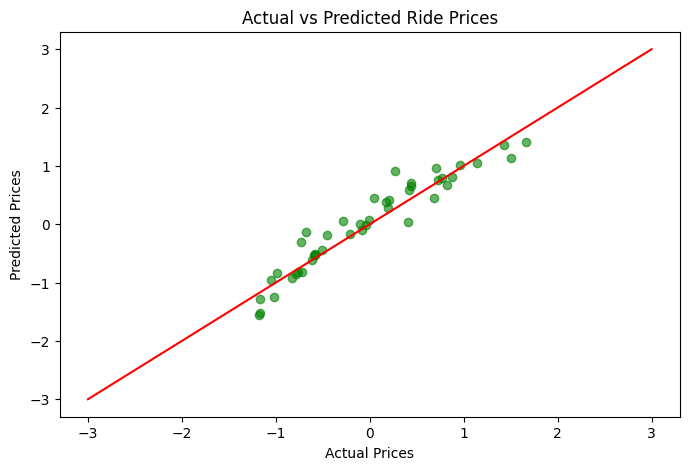

In [13]:
# Step 5: Regression Model — Predict Ride Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. Split data into features (X) and target (y)
X = df_encoded.drop('ride_price', axis=1)
y = df_encoded['ride_price']

# 2. Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = reg_model.predict(X_test)

# 5. Evaluate using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")

# 6. Plot predicted vs actual prices
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.title('Actual vs Predicted Ride Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([-3,3], [-3,3], color='red')  # reference line
plt.show()

In [14]:
# Step 6: Classification Model — High-Cost vs Low-Cost Ride
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Create binary target: 1 = high cost, 0 = low cost
# Use the median ride price as threshold
median_price = df['ride_price'].median()
df_encoded['high_cost'] = (df['ride_price'] > median_price).astype(int)

# 2. Split features and target
X_cls = df_encoded.drop(['ride_price', 'high_cost'], axis=1)
y_cls = df_encoded['high_cost']

# 3. Split into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 4. Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_cls, y_train_cls)

# 5. Predict on test set
y_pred_cls = log_model.predict(X_test_cls)
y_prob_cls = log_model.predict_proba(X_test_cls)[:,1]  # probabilities for high-cost

# 6. Evaluate
accuracy = accuracy_score(y_test_cls, y_pred_cls)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)


Classification Accuracy: 0.932
Confusion Matrix:
[[19  1]
 [ 2 22]]


In [15]:
# Step 7: Model Evaluation & Feature Importance

# 1. Regression — Check coefficients
reg_coeffs = pd.Series(reg_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Top Regression Features by Impact:")
print(reg_coeffs.head(10))

# 2. Classification — Check coefficients
cls_coeffs = pd.Series(log_model.coef_[0], index=X_cls.columns).sort_values(key=abs, ascending=False)
print("\nTop Classification Features by Impact:")
print(cls_coeffs.head(10))

# 3. Optional: Comment on how data quality affects results
print("\nData Quality Impact:")
print("- Missing values, inconsistent labels, or outliers could skew model predictions.")
print("- Cleaning and encoding ensures models learn true patterns rather than noise.")


Top Regression Features by Impact:
vehicle_type_Premium     0.866245
distance_km              0.750898
demand_level_Low        -0.675596
demand_level_Medium     -0.594241
weather_Rainy            0.340942
vehicle_type_Standard    0.319766
traffic_level_High       0.309893
weather_rainy            0.230091
traffic_level_Medium     0.103541
traffic_level_Low       -0.103304
dtype: float64

Top Classification Features by Impact:
distance_km              2.117720
demand_level_Low        -1.899952
duration_min             1.730895
vehicle_type_Standard    1.627641
demand_level_Medium     -1.370367
vehicle_type_Premium     1.264503
traffic_level_High       0.987814
weather_Rainy            0.461433
traffic_level_Low       -0.439934
time_of_day_Night        0.418585
dtype: float64

Data Quality Impact:
- Missing values, inconsistent labels, or outliers could skew model predictions.
- Cleaning and encoding ensures models learn true patterns rather than noise.


Step 8: Ethical & Practical Reflection

1️⃣ Potential Unfair Pricing Behavior

The model could charge higher prices during bad weather or peak demand times, disproportionately affecting riders who have no choice but to travel.

Example: A rider traveling in heavy rain may face surge pricing that seems unfair.

2️⃣ Real-World Risk of Deploying This Model

If the model learns from biased or incomplete data, it may consistently overprice or underprice certain routes or times.

Unexpected outliers or rare events could lead to incorrect price predictions, impacting customer trust.

3️⃣ Dataset Limitations

* This dataset is synthetic and may not fully capture real-world ride patterns.

* Certain features like driver experience, city-specific pricing rules, or actual traffic variations were not included.

* Small dataset size (200+ rows) limits generalization.